# secretary problem

### Candidates are numbered from 1 to n. where lower the number better the candidate

In [8]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
#n = int(input("Enter the no. of candidates"))

In [19]:
def choosen_candidate(n,reject = np.e):
    '''Choose a candidate from a list of n candidates using 
the optimal strategy.'''
    candidates = np.arange(1,n+1)
    np.random.shuffle(candidates)

    #We start searching the best one after rejecting (n/e or ~37%) candidates 

    if reject == np.e:
        stop = int(round(n/reject))
    else:
        stop = int(round(reject*n/100))


    best_from_rejected = np.min(candidates[:stop])
    rest = candidates[stop:]

    
    try:
        return rest[rest < best_from_rejected][0]
    except IndexError:
        #if there is no best candidate then we are returning the last candidate
        return  candidates[-1]

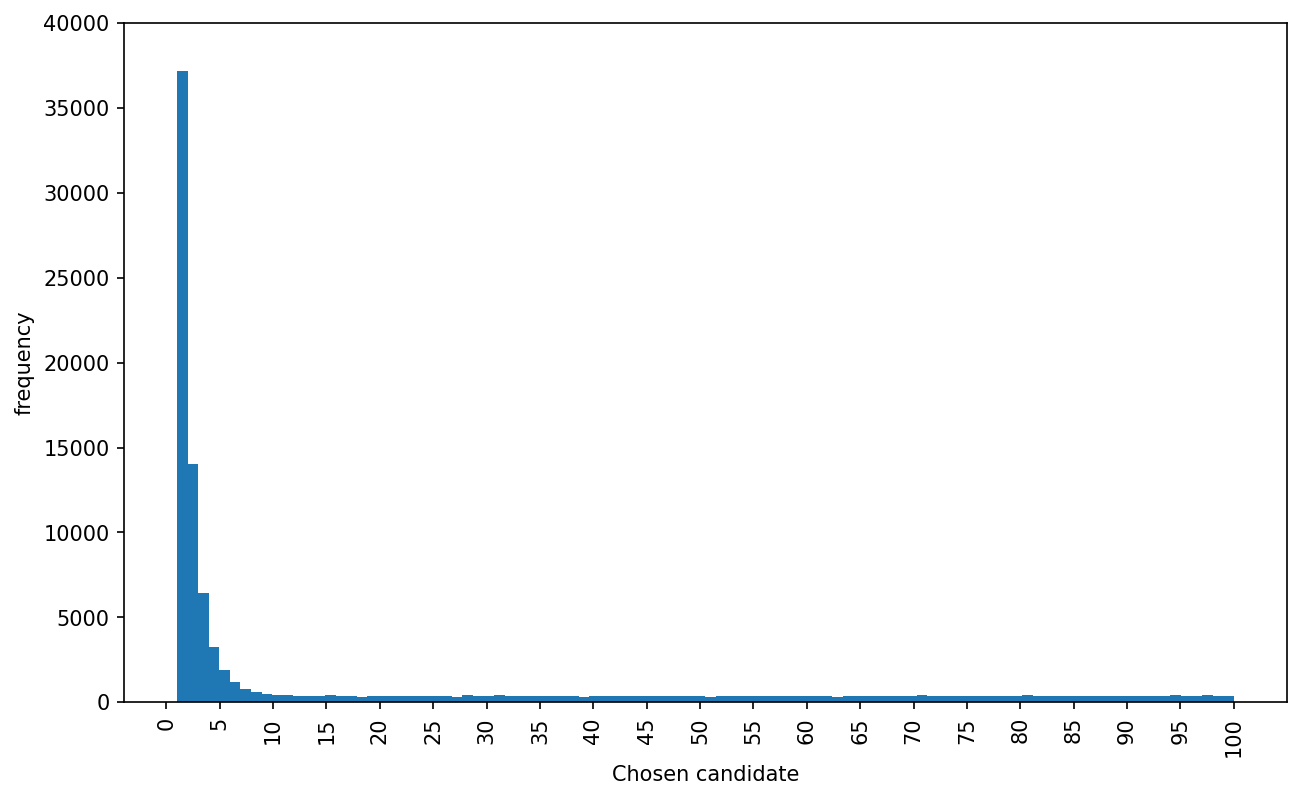

In [22]:
sim = np.array([choosen_candidate(n=100) for i in range(100000)])

plt.figure(figsize=(10, 6),dpi=150)
plt.hist(sim, bins=100)
plt.xticks(np.arange(0, 101, 5),rotation=90)
plt.ylim(0, 40000)
plt.xlabel('Chosen candidate')
plt.ylabel('frequency')
plt.show()

In [23]:
best_candidate = []
for r in range(5, 101, 5):
    sim = np.array([choosen_candidate(n=100, reject=r) for i in range(100000)])
    # np.histogram counts frequency of each candidate
    best_candidate.append(np.histogram(sim, bins=100)[0][0]/100000)

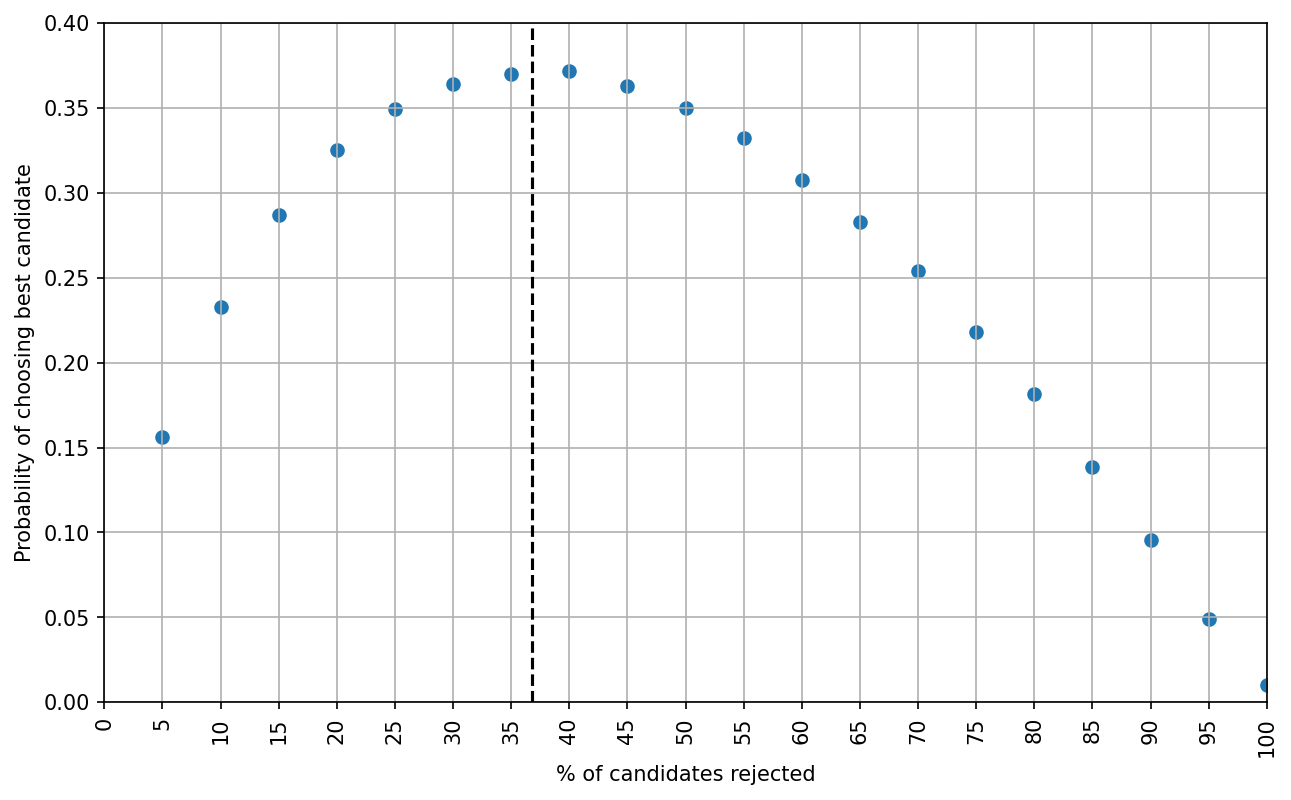

In [24]:
plt.figure(figsize=(10, 6),dpi=150)
plt.scatter(range(5, 101, 5), best_candidate)
plt.xlim(0, 100)
plt.xticks(np.arange(0, 101, 5),rotation=90)
plt.ylim(0, 0.4)
plt.xlabel('% of candidates rejected')
plt.ylabel('Probability of choosing best candidate')
plt.grid(True)
plt.axvline(100/np.e, ls='--', c='black')
plt.show()

### if we are selecting the one of the best rather than very best candidate

In [32]:
def get_best_candidates(best_n=1):
    '''Return a list of probabilities for different rejection strategies and specify what percentage of the
    best candidates we want to select.'''
    
    best_candidate = []
    for c in range(5, 101, 5):
        sim = np.array([choosen_candidate(100, reject=c) for i in range(10000)])
        best_candidate.append(len(sim[sim <= best_n])/100)
        
    return best_candidate


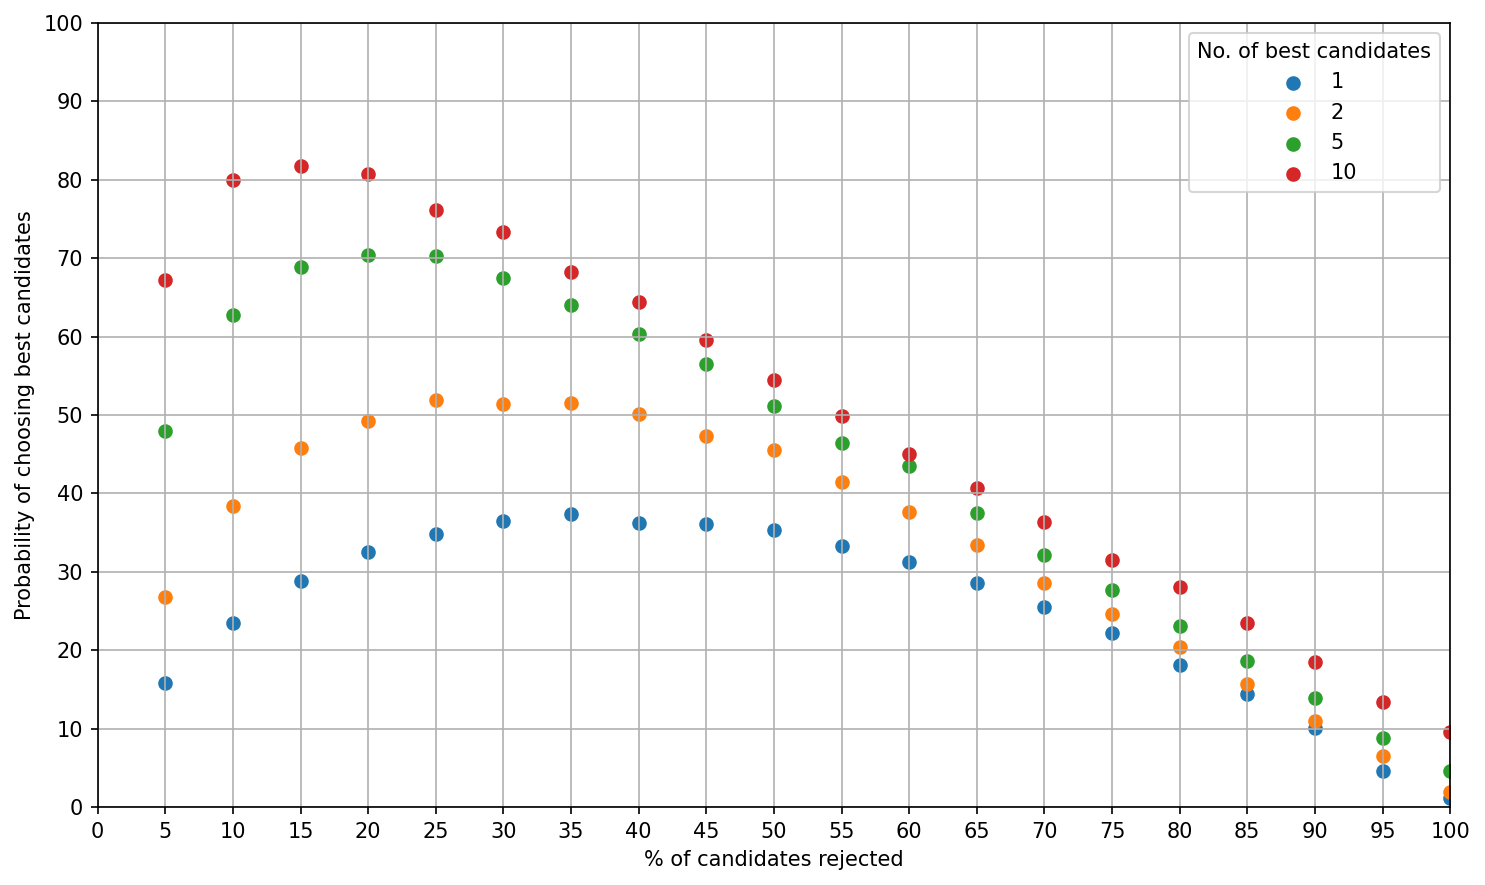

In [34]:
plt.figure(figsize=(10, 6),dpi=150)
for i in [1, 2, 5, 10]:
    plt.scatter(range(5, 101, 5), get_best_candidates(i), label=str(i))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 101, 5))
plt.yticks(np.arange(0, 101, 10))
plt.xlabel('% of candidates rejected')
plt.ylabel('Probability of choosing best candidates')
plt.legend(title='No. of best candidates')
plt.grid(True)
plt.tight_layout()
plt.show()